# Aprendizaje básico de redes neuronales

Este notebook es la primera sesión de notas sobre redes neuronales.

Vamos a seguir la ruta de aprendizaje de Google Tensorflow.



### El primer apartado va a ser la librería Pandas


## Lo básico de Pandas

In [3]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.2.4'

Tenemos dos tipos de estructuras de datos en *pandas*:

  * **`DataFrame`**, son tablas de datos relacionales, clave-valor, filas y columnas.
  * **`Series`**, es una simple columna, mientras que `DataFrame` tiene varias `Series`.

Con el data frame te abstraes para manipular datos, de manera similar a [Spark](https://spark.apache.org/) o [R](https://www.r-project.org/about.html).

Ejemplo para crear una `Serie`:

In [4]:
pd.Series(['Madrid','Barcelona','Málaga'])

0       Madrid
1    Barcelona
2       Málaga
dtype: object

Los `DataFrames` se pueden crear de la siguiente forma:

In [5]:
ciudades = pd.Series(['Madrid','Barcelona','Málaga'])
codigos_postales = pd.Series([28000, 18001 ,29590])

ciudades_espanolas = pd.DataFrame({'Ciudades': ciudades, 'Codigos Postales': codigos_postales})

Podemos también introducir datos de algun tipo de fichero

In [6]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
#california_housing_dataframe.describe()

Mira la diferencia frente usar `describe()`, al usarlo ves una pequeña descripción de los datos, la media, cuantos datos hay, etc.

In [7]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Con el comando `head()` ves una pequeña parte de los datos que hay en la tabla, la cabeza. 

In [8]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Con `hist()` puedes ver la distribución de la tabla:

array([[<AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

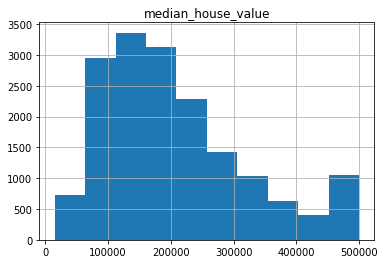

In [9]:
california_housing_dataframe.hist('median_house_value')

## Cómo acceder a los datos

In [29]:
#ciudades_espanolas = pd.DataFrame({'Ciudades': ciudades, 'Codigos Postales': codigos_postales})
print(type(ciudades_espanolas['Ciudades']))

<class 'pandas.core.series.Series'>


Aqui estamos tomando la columna Ciudades

In [31]:
c = ciudades_espanolas[['Ciudades']]
print(c)

    Ciudades
0     Madrid
1  Barcelona
2   Ciudades


Mientras que aquí tomamos solamente los datos

In [27]:
ciudades_espanolas['Ciudades']

0       Madrid
1    Barcelona
2     Ciudades
Name: Ciudades, dtype: object

In [12]:
ciudades_espanolas['Ciudades'][0]

'Madrid'

In [13]:
ciudades_espanolas[0:2]

,Ciudades,Codigos Postales
0,Madrid,28000
1,Barcelona,18001


In [14]:
ciudades_espanolas

,Ciudades,Codigos Postales
0,Madrid,28000
1,Barcelona,18001
2,Málaga,29590


Para indexar tablas tenemos dos métodos: 
- `.loc`: que básicamente le puedes pasar etiquetas `['a', 'b', 'c']` o objetos con etiquetas `'a':'f'`
- `.iloc`: que le pasas la posición que quieres cambiar como un entero. También puedes pasar listas de valores `[4, 3, 0]` o porciones `1:7`.

Veamos un ejemplo, en la posición *2* queremos tener la ciudad de *Sevilla*:

In [15]:
ciudades_espanolas.iloc[2] = {'Ciudades': 'Sevilla', 'Codigos Postales': 28872}

In [16]:
ciudades_espanolas

,Ciudades,Codigos Postales
0,Madrid,28000
1,Barcelona,18001
2,Ciudades,Codigos Postales


Queremos que nos muestre los que están por encima del *1*:

In [17]:
ciudades_espanolas.loc[1:]

,Ciudades,Codigos Postales
1,Barcelona,18001
2,Ciudades,Codigos Postales


In [18]:
ciudades_espanolas

,Ciudades,Codigos Postales
0,Madrid,28000
1,Barcelona,18001
2,Ciudades,Codigos Postales


## Manipulando Datos

Para manipular los datos puedes hacer tanto operaciones aritméticas, como hacer uso de otras librerías como numpy para gestionar datos a gran escala:

In [19]:
codigos_postales / 100

0    280.00
1    180.01
2    295.90
dtype: float64

In [20]:
import numpy as np

El método `apply()` es como hacer `map` en una lista. Va iterando todos los elementos de la tabla devolviendo el valor que quieres:

In [21]:
ciudades.apply(lambda c: 'Madrid' in c)

0     True
1    False
2    False
dtype: bool

Para insertar una nueva columna podemos hacerlo de la siguiente forma:

In [22]:
ciudades_espanolas['Barrio'] = pd.Series(['Malasaña','Las Ramblas', 'Plaza España'])
ciudades_espanolas

,Ciudades,Codigos Postales,Barrio
0,Madrid,28000,Malasaña
1,Barcelona,18001,Las Ramblas
2,Ciudades,Codigos Postales,Plaza España


También se pueden operar las series, hay que destacar que es más conveniente usar el operador lógico and como `&` en vez de `and`, ya que las series operan a nivel de bit:

In [23]:
ciudades_espanolas['Empieza por M'] = ciudades_espanolas['Ciudades'].apply(lambda nombre: nombre.startswith('M'))
ciudades_espanolas

,Ciudades,Codigos Postales,Barrio,Empieza por M
0,Madrid,28000,Malasaña,True
1,Barcelona,18001,Las Ramblas,False
2,Ciudades,Codigos Postales,Plaza España,False


## Indices

In [24]:
ciudades_espanolas.index

RangeIndex(start=0, stop=3, step=1)

Podremos reordenar las filas de la siguiente manera:

In [25]:
ciudades_espanolas.reindex([1,0,2])

,Ciudades,Codigos Postales,Barrio,Empieza por M
1,Barcelona,18001,Las Ramblas,False
0,Madrid,28000,Malasaña,True
2,Ciudades,Codigos Postales,Plaza España,False
